In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

# Select Structured Dataset

In [2]:
df = pd.read_csv('data\\structured_data_car_price_prediction.csv')

df.head()

,City,FuelType,BodyType,KmsDriven,TransmissionType,NumberOwner,Manufacturer,CarModel,ModelYear,CentralVariantId,...,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size
0,Bangalore,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,3979,...,4.7 metres,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,235-litres,NaN,NaN
1,Bangalore,Petrol,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,6087,...,5.3 metres,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",4.0,352-litres,16,16
2,Bangalore,Petrol,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,2983,...,4.9 meters,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,5.0,242-litres,14,14
3,Bangalore,Petrol,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,1867,...,4.7 metres,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4.0,407-litres,14,14
4,Bangalore,Diesel,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,...,5.2 meters,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5.0,353-litres,16,16


In [3]:
df.isnull().sum()

City                      0
FuelType                  0
BodyType                  4
KmsDriven                 0
TransmissionType          0
NumberOwner               0
Manufacturer              0
CarModel                  0
ModelYear                 0
CentralVariantId          0
VariantName               0
Price                     0
RegistrationYear          0
Insurance                 0
Mileage                 287
Engine                    4
Max Power                60
Torque                   60
Seats                     6
Color                     3
Engine Type             295
Displacement              4
Max Torque               60
No of Cylinder           31
Values per Cylinder      51
Value Configuration    2216
Fuel Suppy System      1727
BoreX Stroke           5964
Compression Ratio      6474
Turbo Charger          1040
Super Charger          1962
Length                   79
Width                    83
Height                   79
Wheel Base              163
Front Tread         

In [4]:
df.shape

df['Mileage'].unique()

array(['23.1 kmpl', '17 kmpl', '23.84 kmpl', '19.1 kmpl', '23.65 kmpl',
       '17.1 kmpl', '20.63 kmpl', '18.15 kmpl', '20.28 kmpl', '21.4 kmpl',
       '18.9 kmpl', '18.2 kmpl', '15.1 kmpl', nan, '21.27 kmpl',
       '17.33 kmpl', '17.8 kmpl', '18.48 kmpl', '22.38 kmpl',
       '16.42 kmpl', '7.81 kmpl', '17.4 kmpl', '20.3 kmpl', '13.45 kmpl',
       '15 kmpl', '17.11 kmpl', '20.14 kmpl', '20.51 kmpl', '19.34 kmpl',
       '12.6 kmpl', '15.56 kmpl', '11.5 kmpl', '19.87 kmpl', '18.6 kmpl',
       '22.54 kmpl', '16.3 kmpl', '18.53 kmpl', '22.05 kmpl',
       '12.05 kmpl', '16.5 kmpl', '19.7 kmpl', '11.3 kmpl', '14.08 kmpl',
       '12.07 kmpl', '22 kmpl', '21.5 kmpl', '15.3 kmpl', '26.68 kmpl',
       '21.14 kmpl', '15.9 kmpl', '19.67 kmpl', '14.6 kmpl', '28.4 kmpl',
       '21.76 kmpl', '26.21 kmpl', '19 kmpl', '19.98 kmpl', '18.5 kmpl',
       '20 kmpl', '16.8 kmpl', '17.2 kmpl', '21.13 kmpl', '24 kmpl',
       '25.32 kmpl', '16.55 kmpl', '19.2 kmpl', '24.04 kmpl',
       '27.03 kmpl

# Selecting dependent variables

Removing unwanted columns and only selecting dependent variables

In [5]:
required_columns = ['City','FuelType', 'BodyType', 'KmsDriven', 'TransmissionType', 'NumberOwner', 'Insurance', 'Manufacturer',
    'CarModel', 'ModelYear', 'VariantName', 'Mileage', 'Engine', 'Price', 'No of Cylinder', 'Seats'
] 

# Check which of these columns exist in the DataFrame
available_columns = [col for col in required_columns if col in df.columns]

# If some columns are missing, print them out (optional)
missing_columns = set(required_columns) - set(available_columns)
if missing_columns:
    print(f"The following columns are missing from the DataFrame: {missing_columns}")

# Extract the available columns from the DataFrame
df_filtered = df[available_columns]

# Show the filtered DataFrame
df_filtered.head()

,City,FuelType,BodyType,KmsDriven,TransmissionType,NumberOwner,Insurance,Manufacturer,CarModel,ModelYear,VariantName,Mileage,Engine,Price,No of Cylinder,Seats
0,Bangalore,Petrol,Hatchback,"1,20,000",Manual,3,Third Party insurance,Maruti,Maruti Celerio,2015,VXI,23.1 kmpl,998 CC,400000.0,3.0,5.0
1,Bangalore,Petrol,SUV,"32,706",Manual,2,Comprehensive,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,17 kmpl,1497 CC,811000.0,3.0,5.0
2,Bangalore,Petrol,Hatchback,"11,949",Manual,1,Comprehensive,Tata,Tata Tiago,2018,1.2 Revotron XZ,23.84 kmpl,1199 CC,585000.0,3.0,5.0
3,Bangalore,Petrol,Sedan,"17,794",Manual,1,Comprehensive,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,19.1 kmpl,1197 CC,462000.0,4.0,5.0
4,Bangalore,Diesel,SUV,"60,000",Manual,1,Third Party insurance,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,23.65 kmpl,1248 CC,790000.0,4.0,5.0


In [6]:
print(df_filtered.isnull().sum())

City                  0
FuelType              0
BodyType              4
KmsDriven             0
TransmissionType      0
NumberOwner           0
Insurance             0
Manufacturer          0
CarModel              0
ModelYear             0
VariantName           0
Mileage             287
Engine                4
Price                 0
No of Cylinder       31
Seats                 6
dtype: int64


In [7]:
print(df_filtered.dtypes)

City                 object
FuelType             object
BodyType             object
KmsDriven            object
TransmissionType     object
NumberOwner           int64
Insurance            object
Manufacturer         object
CarModel             object
ModelYear             int64
VariantName          object
Mileage              object
Engine               object
Price               float64
No of Cylinder      float64
Seats               float64
dtype: object


# Age of Car

New Column age of car added

In [8]:
def create_current_year(row):
    current_year = pd.Timestamp.now().year
    return current_year - row['ModelYear']

# Apply the function to create a new feature 'current_year'
df_filtered['AgeOfCar'] = df_filtered.apply(create_current_year, axis=1)

df_filtered

,City,FuelType,BodyType,KmsDriven,TransmissionType,NumberOwner,Insurance,Manufacturer,CarModel,ModelYear,VariantName,Mileage,Engine,Price,No of Cylinder,Seats,AgeOfCar
0,Bangalore,Petrol,Hatchback,"1,20,000",Manual,3,Third Party insurance,Maruti,Maruti Celerio,2015,VXI,23.1 kmpl,998 CC,400000.0,3.0,5.0,9
1,Bangalore,Petrol,SUV,"32,706",Manual,2,Comprehensive,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,17 kmpl,1497 CC,811000.0,3.0,5.0,6
2,Bangalore,Petrol,Hatchback,"11,949",Manual,1,Comprehensive,Tata,Tata Tiago,2018,1.2 Revotron XZ,23.84 kmpl,1199 CC,585000.0,3.0,5.0,6
3,Bangalore,Petrol,Sedan,"17,794",Manual,1,Comprehensive,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,19.1 kmpl,1197 CC,462000.0,4.0,5.0,10
4,Bangalore,Diesel,SUV,"60,000",Manual,1,Third Party insurance,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,23.65 kmpl,1248 CC,790000.0,4.0,5.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Chennai,Petrol,Hatchback,"42,891",Automatic,1,Third Party insurance,Maruti,Maruti Swift,2018,AMT VXI,22 kmpl,1197 CC,620000.0,4.0,5.0,6
8365,Chennai,Diesel,SUV,"59,100",Manual,1,Third Party insurance,Renault,Renault Duster,2018,85PS Diesel RxZ,19.87 kmpl,1461 CC,890000.0,4.0,5.0,6
8366,Chennai,Petrol,SUV,"55,913",Automatic,1,Not Available,Tata,Tata Nexon,2018,1.2 Revotron XZA Plus,17 kmpl,1198 CC,801000.0,3.0,5.0,6
8367,Chennai,Diesel,SUV,"65,000",Automatic,1,Comprehensive,Volkswagen,Volkswagen Tiguan,2017,2.0 TDI Highline,16.65 kmpl,1968 CC,2050000.0,4.0,5.0,7


# Removing null values

In [9]:
df_filtered.drop_duplicates(inplace=True)

In [10]:
# Drop columns with more than 50% missing values
df_filtered = df_filtered.dropna(thresh=len(df_filtered)*0.5, axis=1)

# Drop rows with any missing values
df_filtered = df_filtered.dropna()

print(df_filtered.isnull().sum())

City                0
FuelType            0
BodyType            0
KmsDriven           0
TransmissionType    0
NumberOwner         0
Insurance           0
Manufacturer        0
CarModel            0
ModelYear           0
VariantName         0
Mileage             0
Engine              0
Price               0
No of Cylinder      0
Seats               0
AgeOfCar            0
dtype: int64


In [11]:
df_filtered.shape

(7966, 17)

# Cleaning Mileage Column

In [12]:
df_filtered['Mileage'].value_counts()

18.9 kmpl     306
18.6 kmpl     224
21.4 kmpl     196
17 kmpl       189
18 kmpl       144
             ... 
16.97 kmpl      1
17.97 kmpl      1
11.96 kmpl      1
10.75 kmpl      1
14.85 kmpl      1
Name: Mileage, Length: 521, dtype: int64

In [13]:
df_filtered['Mileage'] = df_filtered['Mileage'].astype(str)

# Remove the 'kmpl' suffix and convert to numeric
df_filtered['Mileage'] = df_filtered['Mileage'].str.replace(' kmpl', '', regex=False)
df_filtered['Mileage'] = df_filtered['Mileage'].str.replace(' km/kg', '', regex=False)
df_filtered['Mileage'] = pd.to_numeric(df_filtered['Mileage'], errors='coerce')


df_filtered.isnull().sum()

City                0
FuelType            0
BodyType            0
KmsDriven           0
TransmissionType    0
NumberOwner         0
Insurance           0
Manufacturer        0
CarModel            0
ModelYear           0
VariantName         0
Mileage             0
Engine              0
Price               0
No of Cylinder      0
Seats               0
AgeOfCar            0
dtype: int64

# Cleanig KmsDriven Column

In [14]:
df_filtered['KmsDriven'] = df_filtered['KmsDriven'].astype(str)
# Step 1: Remove commas
df_filtered['KmsDriven'] = df_filtered['KmsDriven'].str.replace(',', '')

# Step 2: Convert to integer
df_filtered['KmsDriven'] = df_filtered['KmsDriven'].astype(float)

# Display the DataFrame
df_filtered

,City,FuelType,BodyType,KmsDriven,TransmissionType,NumberOwner,Insurance,Manufacturer,CarModel,ModelYear,VariantName,Mileage,Engine,Price,No of Cylinder,Seats,AgeOfCar
0,Bangalore,Petrol,Hatchback,120000.0,Manual,3,Third Party insurance,Maruti,Maruti Celerio,2015,VXI,23.10,998 CC,400000.0,3.0,5.0,9
1,Bangalore,Petrol,SUV,32706.0,Manual,2,Comprehensive,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,17.00,1497 CC,811000.0,3.0,5.0,6
2,Bangalore,Petrol,Hatchback,11949.0,Manual,1,Comprehensive,Tata,Tata Tiago,2018,1.2 Revotron XZ,23.84,1199 CC,585000.0,3.0,5.0,6
3,Bangalore,Petrol,Sedan,17794.0,Manual,1,Comprehensive,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,19.10,1197 CC,462000.0,4.0,5.0,10
4,Bangalore,Diesel,SUV,60000.0,Manual,1,Third Party insurance,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,23.65,1248 CC,790000.0,4.0,5.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Chennai,Petrol,Hatchback,42891.0,Automatic,1,Third Party insurance,Maruti,Maruti Swift,2018,AMT VXI,22.00,1197 CC,620000.0,4.0,5.0,6
8365,Chennai,Diesel,SUV,59100.0,Manual,1,Third Party insurance,Renault,Renault Duster,2018,85PS Diesel RxZ,19.87,1461 CC,890000.0,4.0,5.0,6
8366,Chennai,Petrol,SUV,55913.0,Automatic,1,Not Available,Tata,Tata Nexon,2018,1.2 Revotron XZA Plus,17.00,1198 CC,801000.0,3.0,5.0,6
8367,Chennai,Diesel,SUV,65000.0,Automatic,1,Comprehensive,Volkswagen,Volkswagen Tiguan,2017,2.0 TDI Highline,16.65,1968 CC,2050000.0,4.0,5.0,7


# Cleaning Engine Column

In [15]:
df_filtered['Engine'] = df_filtered['Engine'].astype(str)

# Remove the 'CC' suffix and convert to numeric
df_filtered['Engine'] = df_filtered['Engine'].str.replace(' CC', '', regex=False)
df_filtered['Engine'] = df_filtered['Engine'].astype(float)

df_filtered

,City,FuelType,BodyType,KmsDriven,TransmissionType,NumberOwner,Insurance,Manufacturer,CarModel,ModelYear,VariantName,Mileage,Engine,Price,No of Cylinder,Seats,AgeOfCar
0,Bangalore,Petrol,Hatchback,120000.0,Manual,3,Third Party insurance,Maruti,Maruti Celerio,2015,VXI,23.10,998.0,400000.0,3.0,5.0,9
1,Bangalore,Petrol,SUV,32706.0,Manual,2,Comprehensive,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,17.00,1497.0,811000.0,3.0,5.0,6
2,Bangalore,Petrol,Hatchback,11949.0,Manual,1,Comprehensive,Tata,Tata Tiago,2018,1.2 Revotron XZ,23.84,1199.0,585000.0,3.0,5.0,6
3,Bangalore,Petrol,Sedan,17794.0,Manual,1,Comprehensive,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,19.10,1197.0,462000.0,4.0,5.0,10
4,Bangalore,Diesel,SUV,60000.0,Manual,1,Third Party insurance,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,23.65,1248.0,790000.0,4.0,5.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Chennai,Petrol,Hatchback,42891.0,Automatic,1,Third Party insurance,Maruti,Maruti Swift,2018,AMT VXI,22.00,1197.0,620000.0,4.0,5.0,6
8365,Chennai,Diesel,SUV,59100.0,Manual,1,Third Party insurance,Renault,Renault Duster,2018,85PS Diesel RxZ,19.87,1461.0,890000.0,4.0,5.0,6
8366,Chennai,Petrol,SUV,55913.0,Automatic,1,Not Available,Tata,Tata Nexon,2018,1.2 Revotron XZA Plus,17.00,1198.0,801000.0,3.0,5.0,6
8367,Chennai,Diesel,SUV,65000.0,Automatic,1,Comprehensive,Volkswagen,Volkswagen Tiguan,2017,2.0 TDI Highline,16.65,1968.0,2050000.0,4.0,5.0,7


In [16]:
print(df_filtered.dtypes)

City                 object
FuelType             object
BodyType             object
KmsDriven           float64
TransmissionType     object
NumberOwner           int64
Insurance            object
Manufacturer         object
CarModel             object
ModelYear             int64
VariantName          object
Mileage             float64
Engine              float64
Price               float64
No of Cylinder      float64
Seats               float64
AgeOfCar              int64
dtype: object


In [17]:
df_filtered['KmsDriven'] = df_filtered['KmsDriven'].astype('int64')
df_filtered['Mileage'] = df_filtered['Mileage'].astype('int64')
df_filtered['Engine'] = df_filtered['Engine'].astype('int64')
df_filtered['No of Cylinder'] = df_filtered['No of Cylinder'].astype('int64')
df_filtered['Seats'] = df_filtered['Seats'].astype('int64')
df_filtered['AgeOfCar'] = df_filtered['AgeOfCar'].astype('int64')

print(df_filtered.dtypes)

df_filtered

City                 object
FuelType             object
BodyType             object
KmsDriven             int64
TransmissionType     object
NumberOwner           int64
Insurance            object
Manufacturer         object
CarModel             object
ModelYear             int64
VariantName          object
Mileage               int64
Engine                int64
Price               float64
No of Cylinder        int64
Seats                 int64
AgeOfCar              int64
dtype: object


,City,FuelType,BodyType,KmsDriven,TransmissionType,NumberOwner,Insurance,Manufacturer,CarModel,ModelYear,VariantName,Mileage,Engine,Price,No of Cylinder,Seats,AgeOfCar
0,Bangalore,Petrol,Hatchback,120000,Manual,3,Third Party insurance,Maruti,Maruti Celerio,2015,VXI,23,998,400000.0,3,5,9
1,Bangalore,Petrol,SUV,32706,Manual,2,Comprehensive,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,17,1497,811000.0,3,5,6
2,Bangalore,Petrol,Hatchback,11949,Manual,1,Comprehensive,Tata,Tata Tiago,2018,1.2 Revotron XZ,23,1199,585000.0,3,5,6
3,Bangalore,Petrol,Sedan,17794,Manual,1,Comprehensive,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,19,1197,462000.0,4,5,10
4,Bangalore,Diesel,SUV,60000,Manual,1,Third Party insurance,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,23,1248,790000.0,4,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Chennai,Petrol,Hatchback,42891,Automatic,1,Third Party insurance,Maruti,Maruti Swift,2018,AMT VXI,22,1197,620000.0,4,5,6
8365,Chennai,Diesel,SUV,59100,Manual,1,Third Party insurance,Renault,Renault Duster,2018,85PS Diesel RxZ,19,1461,890000.0,4,5,6
8366,Chennai,Petrol,SUV,55913,Automatic,1,Not Available,Tata,Tata Nexon,2018,1.2 Revotron XZA Plus,17,1198,801000.0,3,5,6
8367,Chennai,Diesel,SUV,65000,Automatic,1,Comprehensive,Volkswagen,Volkswagen Tiguan,2017,2.0 TDI Highline,16,1968,2050000.0,4,5,7


# Spliting Categorical and Numerical Featues

In [18]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total = df_filtered.isnull().sum().sort_values(ascending=False)
percent=(df_filtered.isnull().sum()/df_filtered.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

numeric_features = [feature for feature in df_filtered.columns if df_filtered[feature].dtype != 'O']
categorical_features = [feature for feature in df_filtered.columns if df_filtered[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------
We have 9 numerical features : ['KmsDriven', 'NumberOwner', 'ModelYear', 'Mileage', 'Engine', 'Price', 'No of Cylinder', 'Seats', 'AgeOfCar']

We have 8 categorical features : ['City', 'FuelType', 'BodyType', 'TransmissionType', 'Insurance', 'Manufacturer', 'CarModel', 'VariantName']


In [19]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
df_filtered.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,KmsDriven,NumberOwner,ModelYear,Mileage,Engine,Price,No of Cylinder,Seats,AgeOfCar
count,7.966000e+03,7966.000000,7966.000000,7966.000000,7966.000000,7.966000e+03,7966.000000,7966.00000,7966.000000
mean,5.975941e+04,1.362917,2016.414261,18.838940,1417.560633,8.959430e+05,3.792493,5.19872,7.585739
std,7.429062e+04,0.640916,3.799510,3.918734,463.656029,1.161776e+06,0.592694,0.65166,3.799510
min,0.000000e+00,0.000000,1985.000000,7.000000,72.000000,2.016100e+04,2.000000,2.00000,1.000000
25%,3.200000e+04,1.000000,2014.000000,17.000000,1197.000000,3.950000e+05,4.000000,5.00000,5.000000
50%,5.500000e+04,1.000000,2017.000000,18.000000,1199.000000,5.990000e+05,4.000000,5.00000,7.000000
75%,8.000000e+04,2.000000,2019.000000,21.000000,1498.000000,9.000000e+05,4.000000,5.00000,10.000000
max,5.500000e+06,5.000000,2023.000000,140.000000,5000.000000,2.600000e+07,23.000000,10.00000,39.000000


In [20]:
print('-'*100)
print('The percentage of each category in categorical column are as follow : ')
print('-'*100 +'\n')
for col in categorical_features:
    print(df_filtered[col].value_counts(normalize=True) * 100)
    print('-'*100)

----------------------------------------------------------------------------------------------------
The percentage of each category in categorical column are as follow : 
----------------------------------------------------------------------------------------------------

Hyderabad    17.813206
Bangalore    17.788099
Delhi        17.411499
Chennai      17.160432
Kolkata      16.482551
Jaipur       13.344213
Name: City, dtype: float64
----------------------------------------------------------------------------------------------------
Petrol      67.009792
Diesel      31.697213
Cng          1.092142
Lpg          0.188300
Electric     0.012553
Name: FuelType, dtype: float64
----------------------------------------------------------------------------------------------------
Hatchback        43.786091
Sedan            26.587999
SUV              24.968617
MUV               4.155159
Minivans          0.263620
Coupe             0.112980
Convertibles      0.075320
Pickup Trucks     0.025107
Wa

# Exploratory Data Analysis

### Univariate Analysis

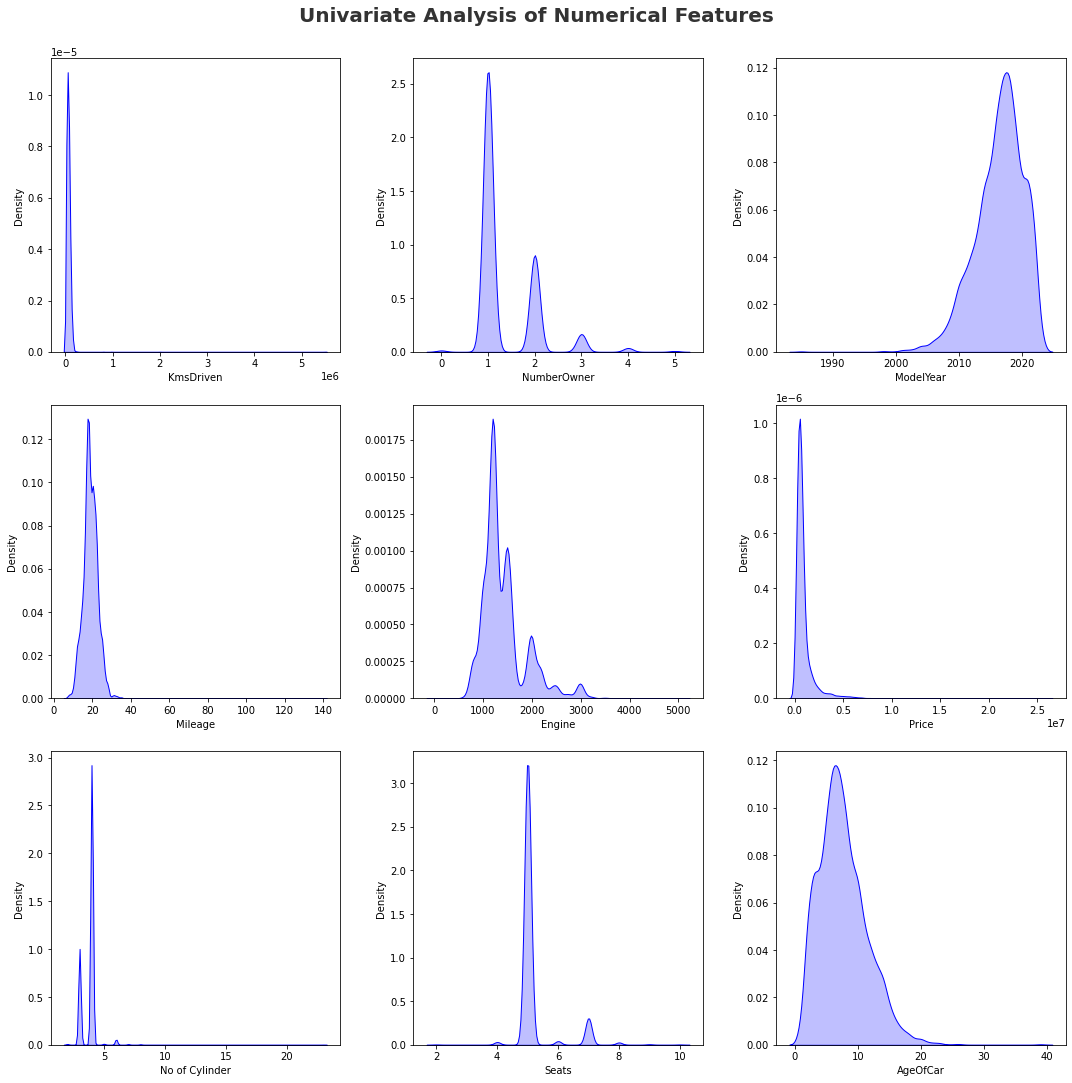

In [21]:
# Ensure all numeric columns are actually numeric
numeric_features = df_filtered.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

# Iterate through numeric features for plotting
for i in range(len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df_filtered[numeric_features[i]], shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

plt.show()

### Box Plot of Numerical Features

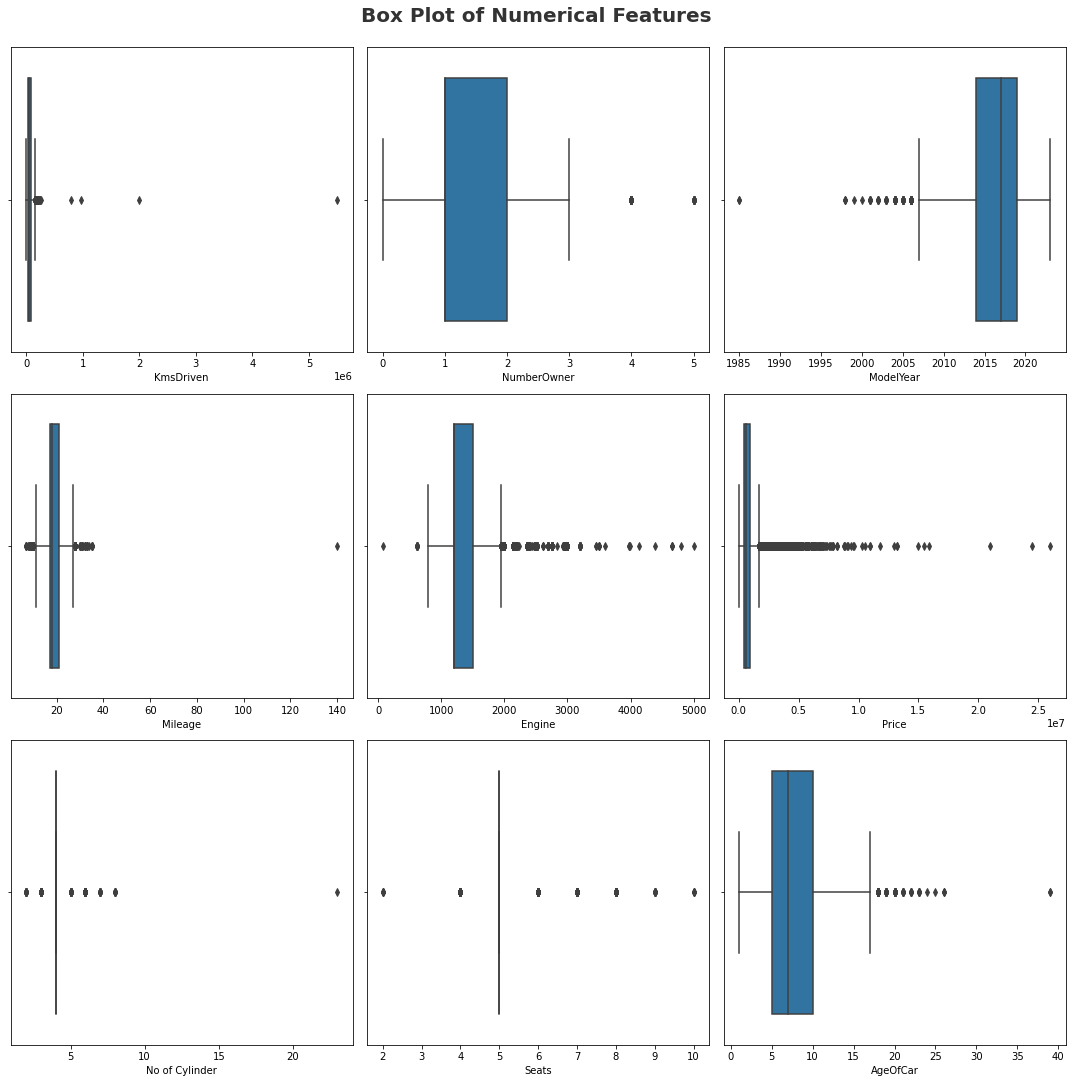

In [22]:
plt.figure(figsize=(15, 15))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df_filtered[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

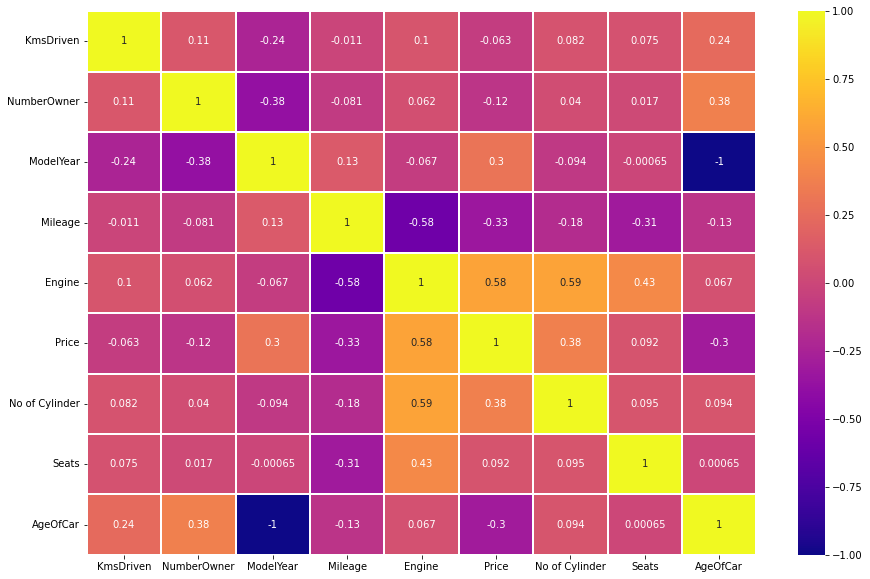

In [23]:
car_corr = df_filtered[numeric_features].corr()
car_corr

plt.figure(figsize=(15,10))
sns.heatmap(car_corr, annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)
plt.show()

# Cleaning Outliers Column in Dataset


We can use the Interquartile Range (IQR) method to detect and visualize outliers.

In [24]:
def detect_outliers_iqr(df_d, column):
    """
    Detects outliers in the given column of the dataframe using the IQR method.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_d[column].quantile(0.25)
    Q3 = df_d[column].quantile(0.75)

    # IQR is the difference between Q3 and Q1
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_d[(df_d[column] < lower_bound) | (df_d[column] > upper_bound)]
    
    print(f"Number of outliers in {column}: {len(outliers)}")
    
    return outliers


# Apply the function to KmsDriven, Price, and AgeOfCar
outliers_kms_driven = detect_outliers_iqr(df_filtered, 'KmsDriven')
outliers_price = detect_outliers_iqr(df_filtered, 'Price')
outliers_mileage_car = detect_outliers_iqr(df_filtered, 'Mileage')
outliers_age_of_car = detect_outliers_iqr(df_filtered, 'AgeOfCar')

# Display the outliers
print("Outliers in KmsDriven:")
print(outliers_kms_driven)

print("\nOutliers in Price:")
print(outliers_price)

print("\nOutliers in AgeOfCar:")
print(outliers_age_of_car)

print("\nOutliers in Mileage:")
print(outliers_mileage_car)

Number of outliers in KmsDriven: 52
Number of outliers in Price: 839
Number of outliers in Mileage: 183
Number of outliers in AgeOfCar: 112
Outliers in KmsDriven:
           City FuelType   BodyType  KmsDriven TransmissionType  NumberOwner  \
304   Bangalore   Diesel        SUV     164000           Manual            2   
333   Bangalore   Diesel        SUV     174000        Automatic            3   
336   Bangalore   Diesel        MUV     199000           Manual            2   
1230  Bangalore   Diesel        MUV     162000           Manual            1   
1234  Bangalore   Diesel        SUV     180000           Manual            2   
1282  Bangalore   Diesel        SUV     174000           Manual            1   
1285  Bangalore   Diesel        SUV     170402        Automatic            2   
1301  Bangalore   Diesel        MUV     157000           Manual            2   
1403  Bangalore   Diesel        MUV     169219           Manual            2   
1476  Bangalore   Diesel        SUV  

In [25]:
def detect_outliers_iqr(df_d, column):
    """
    Detects outliers in the given column of the dataframe using the IQR method.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_d[column].quantile(0.25)
    Q3 = df_d[column].quantile(0.75)

    # IQR is the difference between Q3 and Q1
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_d[(df_d[column] < lower_bound) | (df_d[column] > upper_bound)]
    
    print(f"Number of outliers in {column}: {len(outliers)}")
    
    return outliers


# Apply the function to KmsDriven, Price, and AgeOfCar
outliers_kms_driven = detect_outliers_iqr(df_filtered, 'KmsDriven')
outliers_price = detect_outliers_iqr(df_filtered, 'Price')
outliers_mileage_car = detect_outliers_iqr(df_filtered, 'Mileage')
outliers_age_of_car = detect_outliers_iqr(df_filtered, 'AgeOfCar')

# Display the outliers
print("Outliers in KmsDriven:")
print(outliers_kms_driven)

print("\nOutliers in Price:")
print(outliers_price)

print("\nOutliers in AgeOfCar:")
print(outliers_age_of_car)

print("\nOutliers in Mileage:")
print(outliers_mileage_car)

Number of outliers in KmsDriven: 52
Number of outliers in Price: 839
Number of outliers in Mileage: 183
Number of outliers in AgeOfCar: 112
Outliers in KmsDriven:
           City FuelType   BodyType  KmsDriven TransmissionType  NumberOwner  \
304   Bangalore   Diesel        SUV     164000           Manual            2   
333   Bangalore   Diesel        SUV     174000        Automatic            3   
336   Bangalore   Diesel        MUV     199000           Manual            2   
1230  Bangalore   Diesel        MUV     162000           Manual            1   
1234  Bangalore   Diesel        SUV     180000           Manual            2   
1282  Bangalore   Diesel        SUV     174000           Manual            1   
1285  Bangalore   Diesel        SUV     170402        Automatic            2   
1301  Bangalore   Diesel        MUV     157000           Manual            2   
1403  Bangalore   Diesel        MUV     169219           Manual            2   
1476  Bangalore   Diesel        SUV  

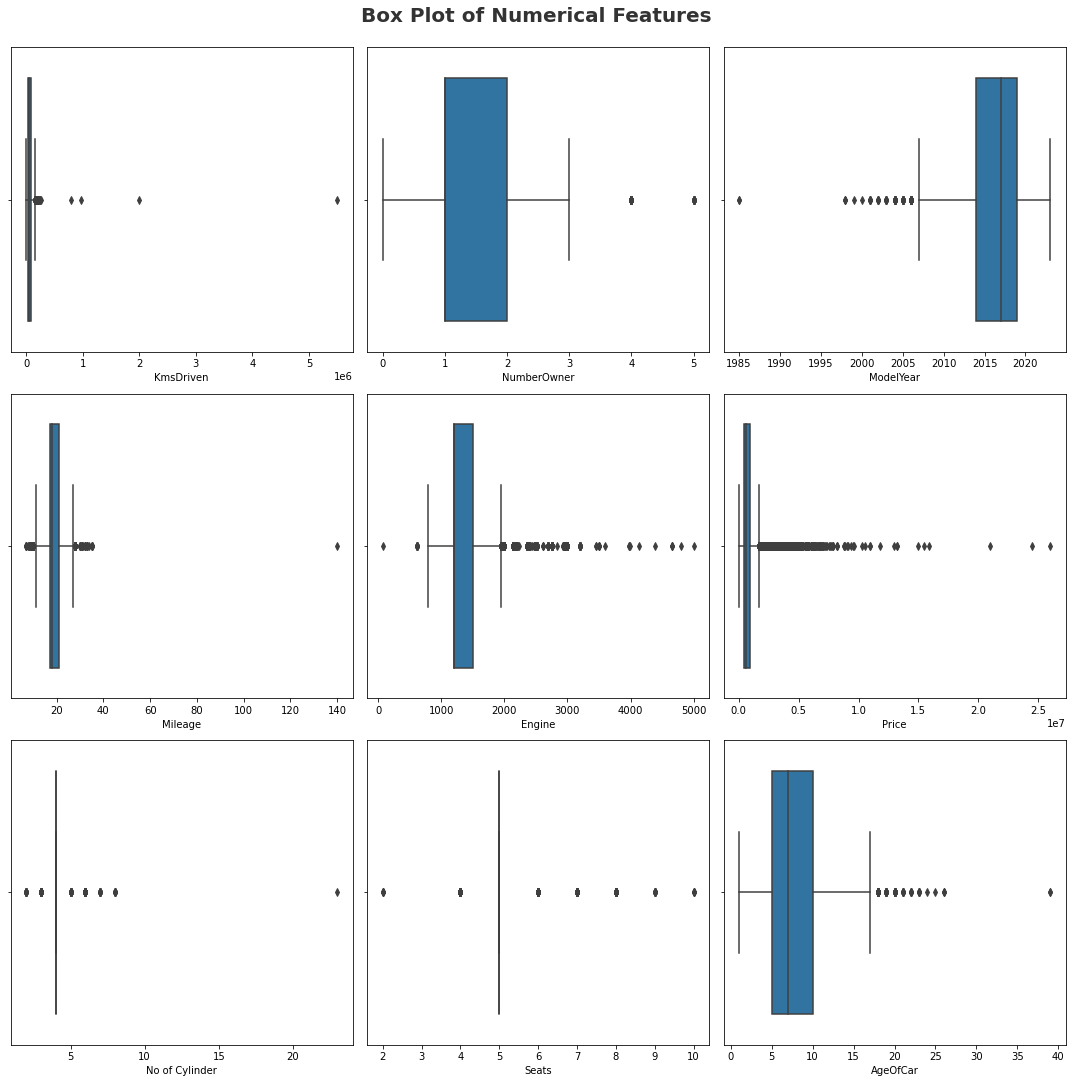

In [26]:
plt.figure(figsize=(15, 15))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df_filtered[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### Univariate Analysis of Categorical Features

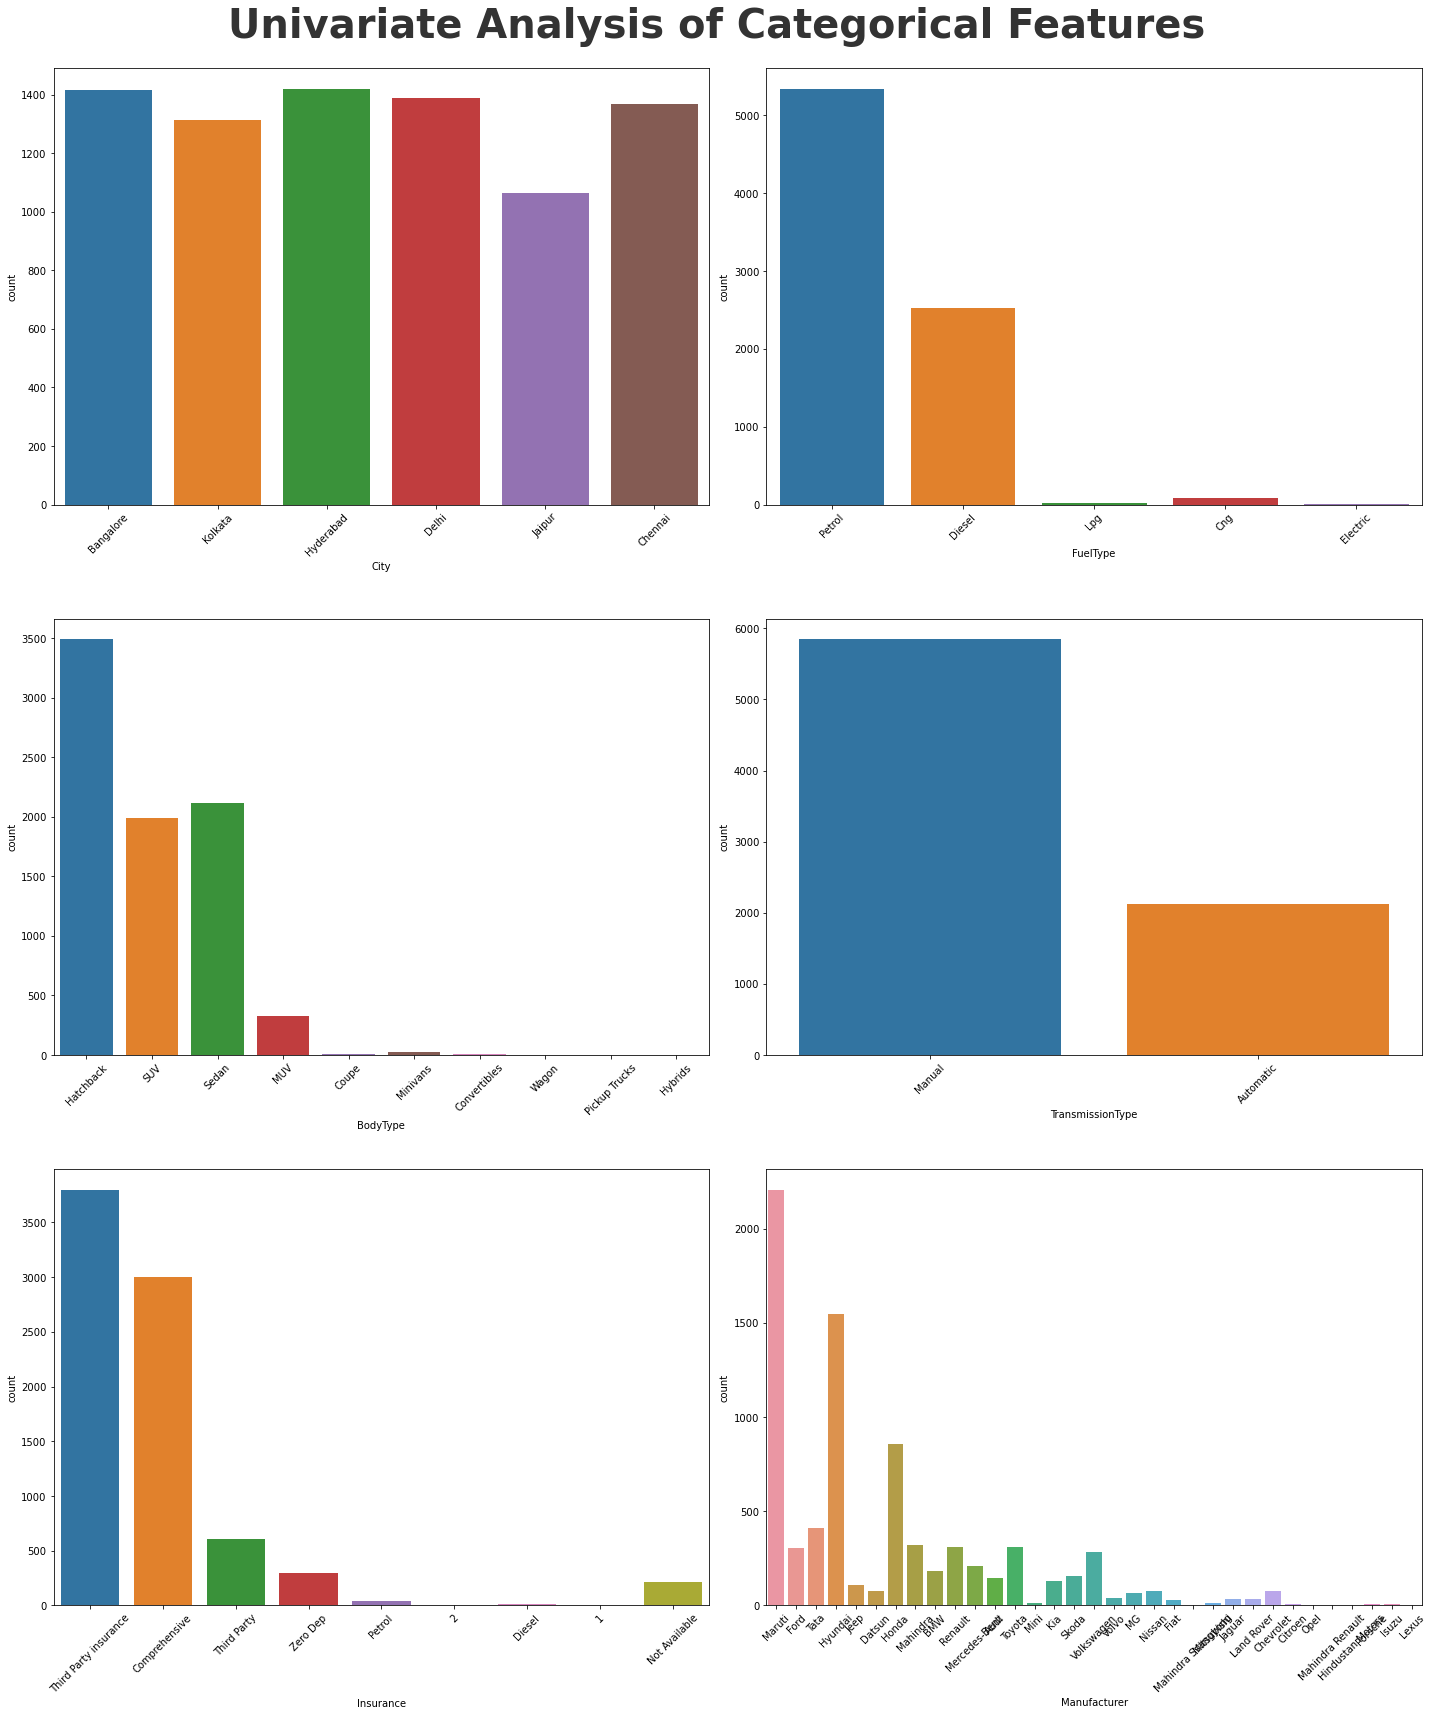

In [27]:
plt.figure(figsize=(20, 30))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=40, fontweight='bold', alpha=0.8, y=1.0)

categories = [ 'City', 'FuelType', 'BodyType', 'TransmissionType', 'Insurance', 'Manufacturer']
for i in range(0, len(categories)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=df_filtered[categories[i]])
    plt.xlabel(categories[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### Bivariate Analysis

In [28]:
continuous_features=[feature for feature in numeric_features if len(df_filtered[feature].unique())>=10]
print('Num of continuos features:',continuous_features)

Num of continuos features: ['KmsDriven', 'ModelYear', 'Mileage', 'Engine', 'Price', 'AgeOfCar']


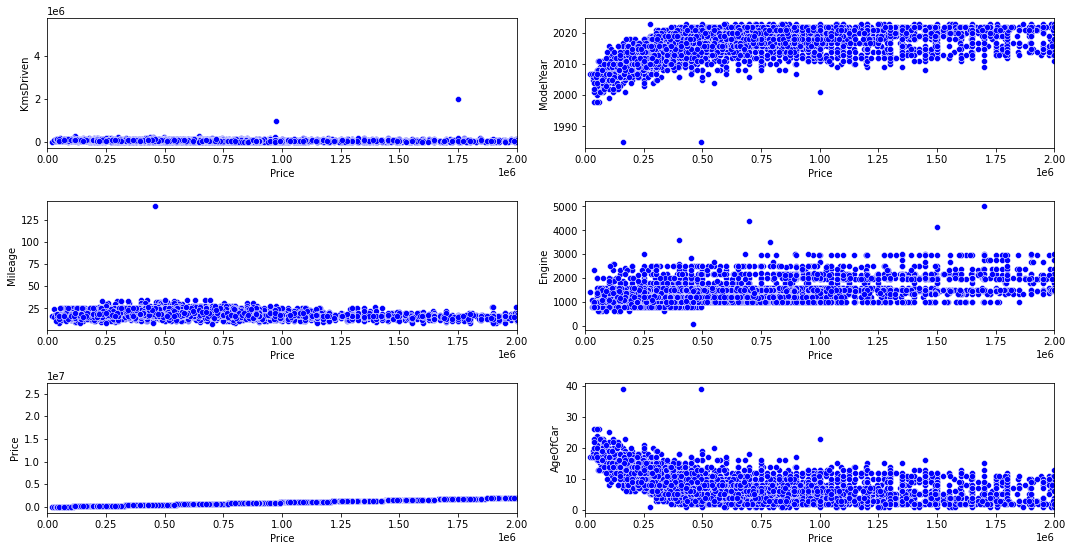

In [29]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df_filtered ,x='Price', y=continuous_features[i], color='b')
    plt.xlim(0,2000000) # Limit to 25 lakhs Rupees to view clean
    plt.tight_layout()

### Multivariate Analysis

In [30]:
df_filtered[numeric_features].corr()

,KmsDriven,NumberOwner,ModelYear,Mileage,Engine,Price,No of Cylinder,Seats,AgeOfCar
KmsDriven,1.000000,0.111097,-0.237374,-0.011134,0.100584,-0.063156,0.082362,0.075242,0.237374
NumberOwner,0.111097,1.000000,-0.376964,-0.080600,0.061848,-0.121321,0.039959,0.017285,0.376964
ModelYear,-0.237374,-0.376964,1.000000,0.131294,-0.067319,0.301652,-0.094344,-0.000648,-1.000000
Mileage,-0.011134,-0.080600,0.131294,1.000000,-0.575444,-0.334743,-0.180557,-0.311653,-0.131294
Engine,0.100584,0.061848,-0.067319,-0.575444,1.000000,0.579411,0.585335,0.431670,0.067319
Price,-0.063156,-0.121321,0.301652,-0.334743,0.579411,1.000000,0.376647,0.091737,-0.301652
No of Cylinder,0.082362,0.039959,-0.094344,-0.180557,0.585335,0.376647,1.000000,0.095400,0.094344
Seats,0.075242,0.017285,-0.000648,-0.311653,0.431670,0.091737,0.095400,1.000000,0.000648
AgeOfCar,0.237374,0.376964,-1.000000,-0.131294,0.067319,-0.301652,0.094344,0.000648,1.000000


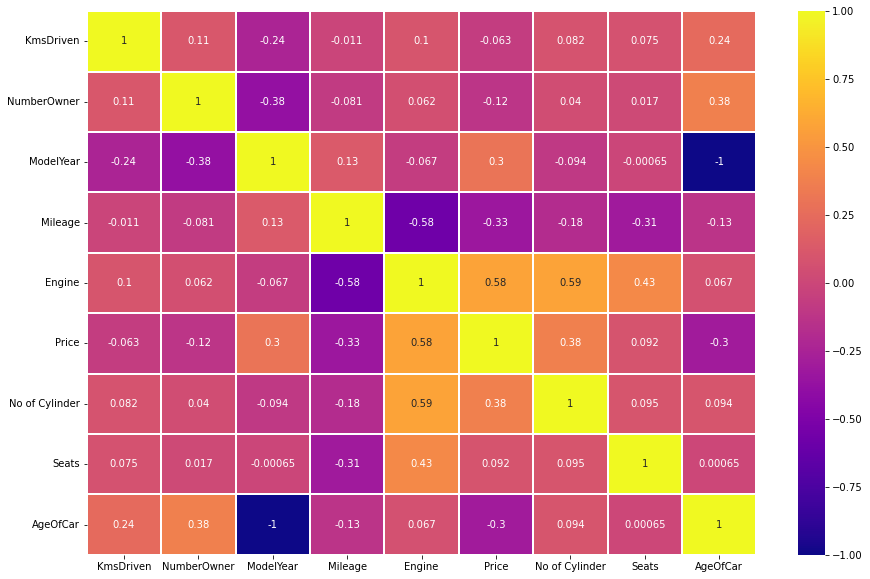

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(data = df_filtered[numeric_features].corr(), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)
plt.show()

### Check Multicollinearity for Categorical features

* A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

* A chi-square statistic is one way to show a relationship between two categorical variables.

* Here we test correlation of Categorical columns with Target column i.e Price

In [32]:
from scipy.stats import chi2_contingency
chi2_test = []

for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df_filtered['Price'], df_filtered[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
test_result = pd.DataFrame(data=[categorical_features, chi2_test]).T
test_result.columns = ['Categorical Features', 'Hypothesis Result']

print('-'*100)
print('Chi-Squarred Test (Checking Multi-collinearity for  Categorical features) results are as follows :')
print('-'*100)

test_result

----------------------------------------------------------------------------------------------------
Chi-Squarred Test (Checking Multi-collinearity for  Categorical features) results are as follows :
----------------------------------------------------------------------------------------------------


,Categorical Features,Hypothesis Result
0,City,Reject Null Hypothesis
1,FuelType,Fail to Reject Null Hypothesis
2,BodyType,Reject Null Hypothesis
3,TransmissionType,Reject Null Hypothesis
4,Insurance,Reject Null Hypothesis
5,Manufacturer,Reject Null Hypothesis
6,CarModel,Reject Null Hypothesis
7,VariantName,Reject Null Hypothesis


In [33]:
df_filtered.head()

,City,FuelType,BodyType,KmsDriven,TransmissionType,NumberOwner,Insurance,Manufacturer,CarModel,ModelYear,VariantName,Mileage,Engine,Price,No of Cylinder,Seats,AgeOfCar
0,Bangalore,Petrol,Hatchback,120000,Manual,3,Third Party insurance,Maruti,Maruti Celerio,2015,VXI,23,998,400000.0,3,5,9
1,Bangalore,Petrol,SUV,32706,Manual,2,Comprehensive,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,17,1497,811000.0,3,5,6
2,Bangalore,Petrol,Hatchback,11949,Manual,1,Comprehensive,Tata,Tata Tiago,2018,1.2 Revotron XZ,23,1199,585000.0,3,5,6
3,Bangalore,Petrol,Sedan,17794,Manual,1,Comprehensive,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,19,1197,462000.0,4,5,10
4,Bangalore,Diesel,SUV,60000,Manual,1,Third Party insurance,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,23,1248,790000.0,4,5,9


# Cleaning Insurance Column

In [34]:
# Dictionary to map incorrect values to the desired ones
insurance_mapping = {
    'Third Party insurance': 'Third Party',
    'Petrol': 'No Insurance',
    'Diesel': 'No Insurance',
    '2': 'Second Party',
    '1': 'First Party',
    'Not Available': 'No Insurance',
    'Zero Dep': 'First Party',
}

# Replace the values in the 'Insurance' column
df_filtered['Insurance'] = df_filtered['Insurance'].replace(insurance_mapping)

# Now check the unique values again to verify the changes
print(df_filtered['Insurance'].unique())

['Third Party' 'Comprehensive' 'First Party' 'No Insurance' 'Second Party']


In [35]:
if df_filtered is not None and all(col in df_filtered.columns for col in ['Mileage_log', 'KmsDriven_log', 'Price_log', 'AgeOfCar_log']):
    df_filtered.drop(labels=['Mileage_log', 'KmsDriven_log', 'Price_log', 'AgeOfCar_log'], axis=1, inplace=True)
else:
    print("One or more columns do not exist, or df_filtered is None")

# Display the resulting DataFrame to ensure it's valid
print(df_filtered)

One or more columns do not exist, or df_filtered is None
           City FuelType   BodyType  KmsDriven TransmissionType  NumberOwner  \
0     Bangalore   Petrol  Hatchback     120000           Manual            3   
1     Bangalore   Petrol        SUV      32706           Manual            2   
2     Bangalore   Petrol  Hatchback      11949           Manual            1   
3     Bangalore   Petrol      Sedan      17794           Manual            1   
4     Bangalore   Diesel        SUV      60000           Manual            1   
...         ...      ...        ...        ...              ...          ...   
8364    Chennai   Petrol  Hatchback      42891        Automatic            1   
8365    Chennai   Diesel        SUV      59100           Manual            1   
8366    Chennai   Petrol        SUV      55913        Automatic            1   
8367    Chennai   Diesel        SUV      65000        Automatic            1   
8368    Chennai   Diesel      Sedan      60000        Automatic

# Save Filtered Dataset into New File

In [36]:
df_filtered.to_csv('data\\df_filtered.csv', index=False)